In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

Creating sample data for demonstration...

Sample data created. Starting analysis...
Data shape: (1000, 6)
Data processed successfully!
Shape: (1000, 10)
Conditions: ['US' 'GS' 'UN' 'GN']
Participants: ['S10' 'S12' 'S11']
Electrodes: ['Cz' 'C4' 'C3']

COMPREHENSIVE ANALYSIS REPORT
Research Question: Does the brain care about grammar because it cares
about grammar, or because grammatical sentences are more sensible?

1. OVERALL ANALYSIS (All electrodes, all participants)

KEY COMPARISONS ANALYSIS - Measure: MAGNITUDE

Grammar Effect (Sensible): GS vs US
Description: Pure grammar effect when sensibility is constant (both sensible)
Mean GS: 0.6310 (±0.8286)
Mean US: 0.6135 (±0.7856)
Difference: 0.0175
Effect size (Cohen's d): 0.0217
p-value: 0.808660
Significance: n.s.
Interpretation: If significant: brain responds to grammar independent of sensibility
------------------------------------------------------------

Grammar Effect (Nonsensible): GN vs UN
Description: Pure grammar effect when

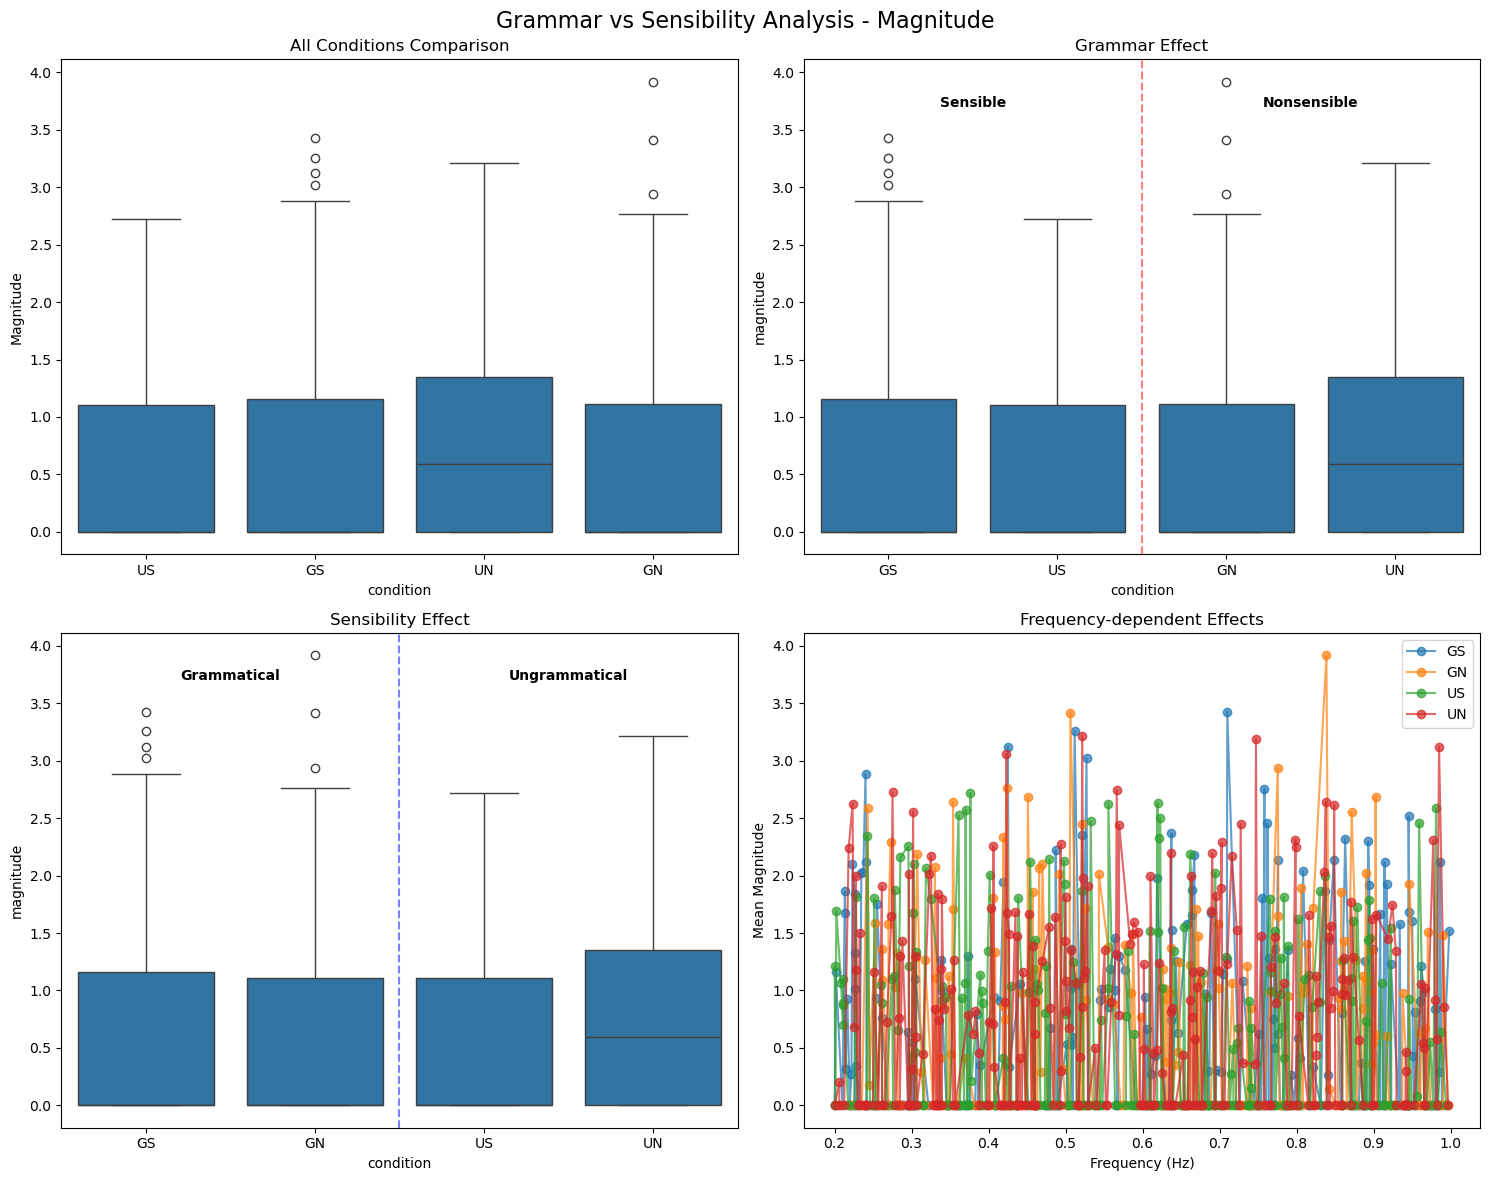

In [23]:


class GrammarSensibilityAnalyzer:
    def __init__(self, df):
        """
        Initialize the analyzer with your EEG dataframe
        
        Parameters:
        df: DataFrame with columns [participant, frequency, electrode, trial, coeff, condition]
        """
        self.df = df.copy()
        self.process_data()
        
    def process_data(self):
        """Process complex coefficients and prepare data for analysis"""
        # Parse complex coefficients
        def parse_complex(coeff_str):
            try:
                # Remove parentheses and convert to complex
                clean_str = str(coeff_str).replace('(', '').replace(')', '')
                complex_num = complex(clean_str)
                return {
                    'real': complex_num.real,
                    'imaginary': complex_num.imag,
                    'magnitude': abs(complex_num),
                    'phase': np.angle(complex_num)
                }
            except:
                return {'real': 0, 'imaginary': 0, 'magnitude': 0, 'phase': 0}
        
        # Apply complex parsing
        complex_data = self.df['coeff'].apply(parse_complex)
        complex_df = pd.DataFrame(list(complex_data))
        
        # Combine with original data
        self.df = pd.concat([self.df, complex_df], axis=1)
        self.df['frequency'] = pd.to_numeric(self.df['frequency'])
        self.df['trial'] = pd.to_numeric(self.df['trial'])
        
        print("Data processed successfully!")
        print(f"Shape: {self.df.shape}")
        print(f"Conditions: {self.df['condition'].unique()}")
        print(f"Participants: {self.df['participant'].unique()}")
        print(f"Electrodes: {self.df['electrode'].unique()}")
        
    def get_condition_data(self, condition, electrode=None, participant=None):
        """Get data for a specific condition with optional filtering"""
        data = self.df[self.df['condition'] == condition].copy()
        
        if electrode:
            data = data[data['electrode'] == electrode]
        if participant:
            data = data[data['participant'] == participant]
            
        return data
    
    def calculate_effect_size(self, group1, group2):
        """Calculate Cohen's d effect size"""
        n1, n2 = len(group1), len(group2)
        pooled_std = np.sqrt(((n1 - 1) * np.var(group1, ddof=1) + 
                             (n2 - 1) * np.var(group2, ddof=1)) / (n1 + n2 - 2))
        return (np.mean(group1) - np.mean(group2)) / pooled_std
    
    def compare_conditions(self, cond1, cond2, measure='magnitude', 
                          electrode=None, participant=None, test='ttest'):
        """
        Compare two conditions statistically
        
        Parameters:
        cond1, cond2: condition names (e.g., 'GS', 'US')
        measure: 'magnitude', 'real', 'imaginary', or 'phase'
        electrode: specific electrode to analyze (optional)
        participant: specific participant to analyze (optional)
        test: 'ttest' or 'mannwhitney'
        """
        data1 = self.get_condition_data(cond1, electrode, participant)[measure]
        data2 = self.get_condition_data(cond2, electrode, participant)[measure]
        
        # Statistical test
        if test == 'ttest':
            stat, p_value = ttest_ind(data1, data2)
            test_name = "Independent t-test"
        else:
            stat, p_value = mannwhitneyu(data1, data2)
            test_name = "Mann-Whitney U test"
        
        # Effect size
        effect_size = self.calculate_effect_size(data1, data2)
        
        results = {
            'condition1': cond1,
            'condition2': cond2,
            'measure': measure,
            'n1': len(data1),
            'n2': len(data2),
            'mean1': np.mean(data1),
            'mean2': np.mean(data2),
            'std1': np.std(data1, ddof=1),
            'std2': np.std(data2, ddof=1),
            'difference': np.mean(data1) - np.mean(data2),
            'statistic': stat,
            'p_value': p_value,
            'effect_size': effect_size,
            'test_used': test_name
        }
        
        return results
    
    def key_comparisons_analysis(self, measure='magnitude', electrode=None, participant=None):
        """
        Perform all key comparisons for your research question:
        Does the brain care about grammar because it cares about grammar, 
        or because grammatical sentences are more sensible?
        """
        
        comparisons = {
            'Grammar Effect (Sensible)': {
                'comparison': 'GS vs US',
                'description': 'Pure grammar effect when sensibility is constant (both sensible)',
                'cond1': 'GS', 'cond2': 'US',
                'interpretation': 'If significant: brain responds to grammar independent of sensibility'
            },
            'Grammar Effect (Nonsensible)': {
                'comparison': 'GN vs UN', 
                'description': 'Pure grammar effect when sensibility is constant (both nonsensible)',
                'cond1': 'GN', 'cond2': 'UN',
                'interpretation': 'If significant: brain responds to grammar even in nonsensible sentences'
            },
            'Sensibility Effect (Grammatical)': {
                'comparison': 'GS vs GN',
                'description': 'Pure sensibility effect when grammar is constant (both grammatical)', 
                'cond1': 'GS', 'cond2': 'GN',
                'interpretation': 'If significant: brain responds to sensibility independent of grammar'
            },
            'Sensibility Effect (Ungrammatical)': {
                'comparison': 'US vs UN',
                'description': 'Pure sensibility effect when grammar is constant (both ungrammatical)',
                'cond1': 'US', 'cond2': 'UN', 
                'interpretation': 'If significant: brain responds to sensibility even in ungrammatical sentences'
            },
            'Maximum Contrast': {
                'comparison': 'GS vs UN',
                'description': 'Best vs worst condition (grammatical+sensible vs ungrammatical+nonsensible)',
                'cond1': 'GS', 'cond2': 'UN',
                'interpretation': 'Overall difference between optimal and worst conditions'
            }
        }
        
        results = {}
        print(f"\n{'='*80}")
        print(f"KEY COMPARISONS ANALYSIS - Measure: {measure.upper()}")
        if electrode: print(f"Electrode: {electrode}")
        if participant: print(f"Participant: {participant}")
        print(f"{'='*80}")
        
        for name, comp in comparisons.items():
            try:
                result = self.compare_conditions(
                    comp['cond1'], comp['cond2'], measure, electrode, participant
                )
                results[name] = result
                
                print(f"\n{name}: {comp['comparison']}")
                print(f"Description: {comp['description']}")
                print(f"Mean {comp['cond1']}: {result['mean1']:.4f} (±{result['std1']:.4f})")
                print(f"Mean {comp['cond2']}: {result['mean2']:.4f} (±{result['std2']:.4f})")
                print(f"Difference: {result['difference']:.4f}")
                print(f"Effect size (Cohen's d): {result['effect_size']:.4f}")
                print(f"p-value: {result['p_value']:.6f}")
                
                # Significance interpretation
                if result['p_value'] < 0.001:
                    sig = "*** (p < 0.001)"
                elif result['p_value'] < 0.01:
                    sig = "** (p < 0.01)"
                elif result['p_value'] < 0.05:
                    sig = "* (p < 0.05)"
                else:
                    sig = "n.s."
                    
                print(f"Significance: {sig}")
                print(f"Interpretation: {comp['interpretation']}")
                print("-" * 60)
                
            except Exception as e:
                print(f"Error in {name}: {e}")
                results[name] = None
        
        return results
    
    def plot_condition_comparison(self, measure='magnitude', electrode=None, participant=None):
        """Plot comparisons across all conditions"""
        
        # Filter data if needed
        plot_data = self.df.copy()
        if electrode:
            plot_data = plot_data[plot_data['electrode'] == electrode]
        if participant:
            plot_data = plot_data[plot_data['participant'] == participant]
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle(f'Grammar vs Sensibility Analysis - {measure.title()}', fontsize=16)
        
        # 1. Box plot of all conditions
        ax1 = axes[0, 0]
        sns.boxplot(data=plot_data, x='condition', y=measure, ax=ax1)
        ax1.set_title('All Conditions Comparison')
        ax1.set_ylabel(f'{measure.title()}')
        
        # 2. Grammar effect (holding sensibility constant)
        ax2 = axes[0, 1]
        grammar_data = plot_data[plot_data['condition'].isin(['GS', 'US', 'GN', 'UN'])]
        sns.boxplot(data=grammar_data, x='condition', y=measure, 
                   order=['GS', 'US', 'GN', 'UN'], ax=ax2)
        ax2.set_title('Grammar Effect')
        ax2.axvline(x=1.5, color='red', linestyle='--', alpha=0.5)
        ax2.text(0.5, ax2.get_ylim()[1]*0.9, 'Sensible', ha='center', fontweight='bold')
        ax2.text(2.5, ax2.get_ylim()[1]*0.9, 'Nonsensible', ha='center', fontweight='bold')
        
        # 3. Sensibility effect (holding grammar constant)  
        ax3 = axes[1, 0]
        sens_data = plot_data[plot_data['condition'].isin(['GS', 'GN', 'US', 'UN'])]
        sns.boxplot(data=sens_data, x='condition', y=measure,
                   order=['GS', 'GN', 'US', 'UN'], ax=ax3)
        ax3.set_title('Sensibility Effect')
        ax3.axvline(x=1.5, color='blue', linestyle='--', alpha=0.5)
        ax3.text(0.5, ax3.get_ylim()[1]*0.9, 'Grammatical', ha='center', fontweight='bold')
        ax3.text(2.5, ax3.get_ylim()[1]*0.9, 'Ungrammatical', ha='center', fontweight='bold')
        
        # 4. Frequency-dependent effects
        ax4 = axes[1, 1]
        for condition in ['GS', 'GN', 'US', 'UN']:
            cond_data = plot_data[plot_data['condition'] == condition]
            if len(cond_data) > 0:
                freq_means = cond_data.groupby('frequency')[measure].mean()
                ax4.plot(freq_means.index, freq_means.values, 
                        marker='o', label=condition, alpha=0.7)
        
        ax4.set_xlabel('Frequency (Hz)')
        ax4.set_ylabel(f'Mean {measure.title()}')
        ax4.set_title('Frequency-dependent Effects')
        ax4.legend()
        
        plt.tight_layout()
        return fig
    
    def electrode_analysis(self, measure='magnitude'):
        """Analyze effects across different electrodes"""
        
        electrodes = self.df['electrode'].unique()
        results = {}
        
        print(f"\n{'='*60}")
        print("ELECTRODE-WISE ANALYSIS")
        print(f"{'='*60}")
        
        for electrode in electrodes:
            print(f"\n--- {electrode} ---")
            electrode_results = self.key_comparisons_analysis(
                measure=measure, electrode=electrode
            )
            results[electrode] = electrode_results
            
        return results
    
    def frequency_band_analysis(self, bands=None, measure='magnitude'):
        """
        Analyze effects in different frequency bands
        
        Parameters:
        bands: dict of frequency bands, e.g., {'theta': (4, 8), 'alpha': (8, 13)}
        """
        if bands is None:
            bands = {
                'theta': (4, 8),
                'alpha': (8, 13), 
                'beta': (13, 30),
                'gamma': (30, 100)
            }
        
        results = {}
        
        print(f"\n{'='*60}")
        print("FREQUENCY BAND ANALYSIS")
        print(f"{'='*60}")
        
        for band_name, (low_freq, high_freq) in bands.items():
            print(f"\n--- {band_name.upper()} BAND ({low_freq}-{high_freq} Hz) ---")
            
            # Filter data for this frequency band
            band_data = self.df[
                (self.df['frequency'] >= low_freq) & 
                (self.df['frequency'] <= high_freq)
            ].copy()
            
            if len(band_data) == 0:
                print(f"No data in {band_name} band")
                continue
            
            # Create temporary analyzer for this band
            temp_analyzer = GrammarSensibilityAnalyzer.__new__(GrammarSensibilityAnalyzer)
            temp_analyzer.df = band_data
            
            band_results = temp_analyzer.key_comparisons_analysis(measure=measure)
            results[band_name] = band_results
            
        return results
    
    def summary_report(self, measure='magnitude'):
        """Generate a comprehensive summary report"""
        
        print(f"\n{'='*80}")
        print("COMPREHENSIVE ANALYSIS REPORT")
        print(f"Research Question: Does the brain care about grammar because it cares")
        print(f"about grammar, or because grammatical sentences are more sensible?")
        print(f"{'='*80}")
        
        # Overall analysis
        print(f"\n1. OVERALL ANALYSIS (All electrodes, all participants)")
        overall_results = self.key_comparisons_analysis(measure=measure)
        
        # Key insights
        print(f"\n2. KEY INSIGHTS:")
        
        if overall_results.get('Grammar Effect (Sensible)') and overall_results.get('Grammar Effect (Nonsensible)'):
            gs_us = overall_results['Grammar Effect (Sensible)']
            gn_un = overall_results['Grammar Effect (Nonsensible)']
            
            if gs_us['p_value'] < 0.05 and gn_un['p_value'] < 0.05:
                print("✓ GRAMMAR MATTERS: Significant grammar effects in both sensible and nonsensible contexts")
                print("  → Brain responds to grammatical structure independent of sensibility")
            elif gs_us['p_value'] < 0.05 and gn_un['p_value'] >= 0.05:
                print("? CONTEXT-DEPENDENT: Grammar effect only in sensible sentences")
                print("  → Grammar and sensibility may interact")
            elif gs_us['p_value'] >= 0.05 and gn_un['p_value'] < 0.05:
                print("? CONTEXT-DEPENDENT: Grammar effect only in nonsensible sentences")
                print("  → Unusual pattern - investigate further")
            else:
                print("✗ NO CLEAR GRAMMAR EFFECT: Non-significant grammar effects")
        
        if overall_results.get('Sensibility Effect (Grammatical)') and overall_results.get('Sensibility Effect (Ungrammatical)'):
            gs_gn = overall_results['Sensibility Effect (Grammatical)']
            us_un = overall_results['Sensibility Effect (Ungrammatical)']
            
            if gs_gn['p_value'] < 0.05 and us_un['p_value'] < 0.05:
                print("✓ SENSIBILITY MATTERS: Significant sensibility effects in both grammatical and ungrammatical contexts")
                print("  → Brain responds to semantic sensibility independent of grammar")
            elif gs_gn['p_value'] < 0.05 and us_un['p_value'] >= 0.05:
                print("? CONTEXT-DEPENDENT: Sensibility effect only in grammatical sentences")
                print("  → Sensibility and grammar may interact")
        
        print(f"\n3. EFFECT SIZES SUMMARY:")
        for name, result in overall_results.items():
            if result:
                effect_magnitude = abs(result['effect_size'])
                if effect_magnitude > 0.8:
                    effect_desc = "Large"
                elif effect_magnitude > 0.5:
                    effect_desc = "Medium"
                elif effect_magnitude > 0.2:
                    effect_desc = "Small"
                else:
                    effect_desc = "Negligible"
                    
                print(f"{name}: d = {result['effect_size']:.3f} ({effect_desc})")
        
        return overall_results

# Example usage and demonstration
def demo_analysis():
    """Demonstrate how to use the analyzer with sample data"""
    
    # Create sample data (you would load your actual data here)
    print("Creating sample data for demonstration...")
    
    np.random.seed(42)
    n_samples = 1000
    
    sample_data = []
    conditions = ['GS', 'GN', 'US', 'UN']
    participants = ['S10', 'S11', 'S12']
    electrodes = ['C3', 'C4', 'Cz']
    
    for i in range(n_samples):
        condition = np.random.choice(conditions)
        participant = np.random.choice(participants)
        electrode = np.random.choice(electrodes)
        
        # Simulate realistic effects
        base_real = np.random.normal(0, 1)
        base_imag = np.random.normal(0, 1)
        
        # Add condition effects
        if condition == 'GS':  # Best condition
            base_real += 0.5
        elif condition == 'GN':  # Grammar but nonsensible
            base_real += 0.2
        elif condition == 'US':  # Sensible but ungrammatical
            base_real += 0.3
        # UN stays at baseline
        
        coeff = f"({base_real:.6f}+{base_imag:.6f}j)"
        
        sample_data.append({
            'participant': participant,
            'frequency': np.random.uniform(0.2, 1.0),
            'electrode': electrode,
            'trial': np.random.randint(1, 10),
            'coeff': coeff,
            'condition': condition
        })
    
    df = pd.DataFrame(sample_data)
    
    print("\nSample data created. Starting analysis...")
    print(f"Data shape: {df.shape}")
    
    # Initialize analyzer
    analyzer = GrammarSensibilityAnalyzer(df)
    
    # Run comprehensive analysis
    results = analyzer.summary_report(measure='magnitude')
    
    # Create plots
    fig = analyzer.plot_condition_comparison(measure='magnitude')
    plt.show()
    
    return analyzer, results

# Instructions for using with your actual data:
"""
TO USE WITH YOUR DATA:

1. Load your dataframe:
   df = pd.read_csv('your_data.csv')
   
2. Make sure columns are named correctly:
   - participant, frequency, electrode, trial, coeff, condition
   
3. Initialize the analyzer:
   analyzer = GrammarSensibilityAnalyzer(df)
   
4. Run the main analysis:
   results = analyzer.summary_report(measure='magnitude')
   
5. Create visualizations:
   fig = analyzer.plot_condition_comparison(measure='magnitude')
   plt.show()
   
6. Analyze specific electrodes:
   electrode_results = analyzer.electrode_analysis(measure='magnitude')
   
7. Analyze frequency bands:
   band_results = analyzer.frequency_band_analysis(measure='magnitude')

8. Individual comparisons:
   gs_vs_us = analyzer.compare_conditions('GS', 'US', measure='magnitude')
"""

if __name__ == "__main__":
    # Run demonstration
    analyzer, results = demo_analysis()

Data processed successfully!
Shape: (3118080, 10)
Conditions: ['GN' 'GS' 'UN' 'US']
Participants: ['S10' 'S11' 'S12' 'S13' 'S14' 'S16' 'S17' 'S18' 'S2' 'S3' 'S5' 'S6' 'S8'
 'S9']
Electrodes: ['C3' 'C4' 'CP1' 'CP2' 'CP5' 'CP6' 'Cz' 'F3' 'F4' 'F7' 'F8' 'FC1' 'FC2'
 'FC5' 'FC6' 'Fp1' 'Fp2' 'Fz' 'O1' 'O2' 'Oz' 'P3' 'P4' 'P7' 'P8' 'PO10'
 'PO9' 'Pz' 'T7' 'T8' 'TP10' 'TP9']

COMPREHENSIVE ANALYSIS REPORT
Research Question: Does the brain care about grammar because it cares
about grammar, or because grammatical sentences are more sensible?

1. OVERALL ANALYSIS (All electrodes, all participants)

KEY COMPARISONS ANALYSIS - Measure: MAGNITUDE

Grammar Effect (Sensible): GS vs US
Description: Pure grammar effect when sensibility is constant (both sensible)
Mean GS: 0.7174 (±1.4600)
Mean US: 0.7043 (±1.2304)
Difference: 0.0132
Effect size (Cohen's d): 0.0097
p-value: 0.000000
Significance: *** (p < 0.001)
Interpretation: If significant: brain responds to grammar independent of sensibility
-------

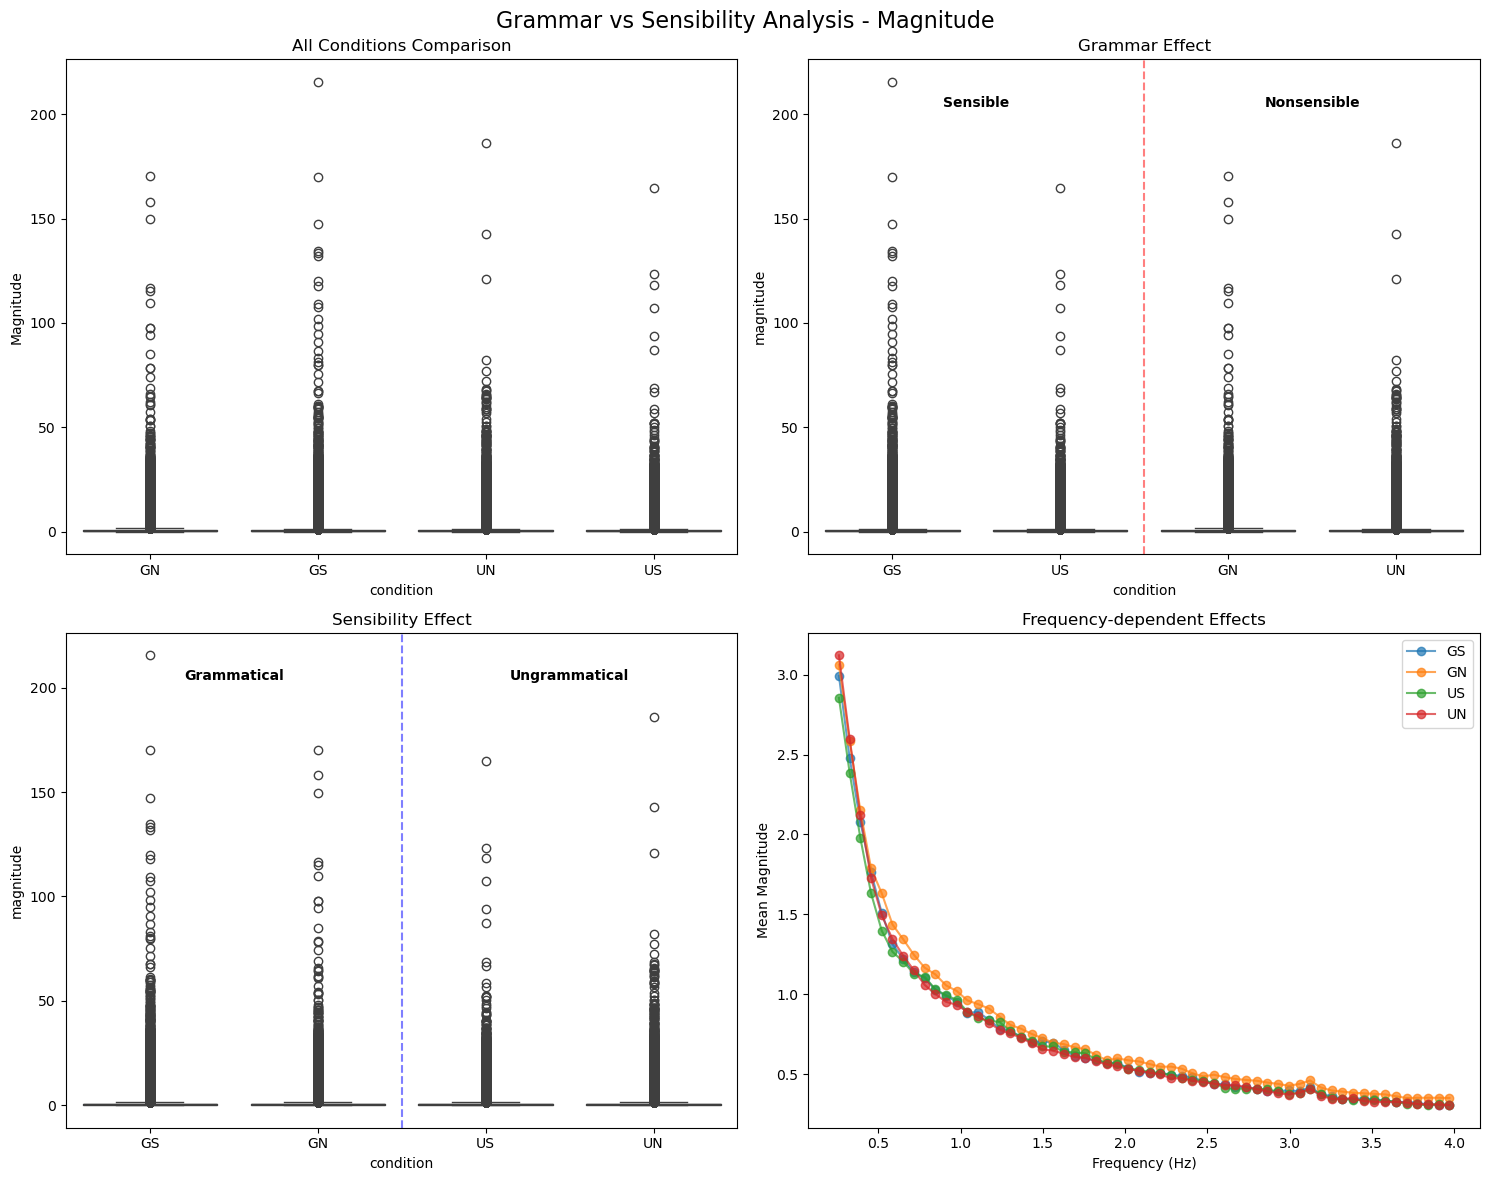


ELECTRODE-WISE ANALYSIS

--- C3 ---

KEY COMPARISONS ANALYSIS - Measure: MAGNITUDE
Electrode: C3

Grammar Effect (Sensible): GS vs US
Description: Pure grammar effect when sensibility is constant (both sensible)
Mean GS: 0.3668 (±0.6756)
Mean US: 0.3575 (±0.6479)
Difference: 0.0093
Effect size (Cohen's d): 0.0141
p-value: 0.120065
Significance: n.s.
Interpretation: If significant: brain responds to grammar independent of sensibility
------------------------------------------------------------

Grammar Effect (Nonsensible): GN vs UN
Description: Pure grammar effect when sensibility is constant (both nonsensible)
Mean GN: 0.4086 (±0.8367)
Mean UN: 0.3737 (±0.7226)
Difference: 0.0349
Effect size (Cohen's d): 0.0446
p-value: 0.000001
Significance: *** (p < 0.001)
Interpretation: If significant: brain responds to grammar even in nonsensible sentences
------------------------------------------------------------

Sensibility Effect (Grammatical): GS vs GN
Description: Pure sensibility effect

In [27]:
df = pd.read_csv('combined_eeg_data.csv')
analyzer = GrammarSensibilityAnalyzer(df)
results = analyzer.summary_report(measure='magnitude')
fig = analyzer.plot_condition_comparison(measure='magnitude')
plt.show()
electrode_results = analyzer.electrode_analysis(measure='magnitude')
band_results = analyzer.frequency_band_analysis(measure='magnitude')
gs_vs_us = analyzer.compare_conditions('GS', 'US', measure='magnitude')